<a href="https://colab.research.google.com/github/Sakshi-Singh2004/make-a-pr/blob/master/23346_Sakshi%20Singh_Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!wget https://www.kaggle.com/datasets/ulrikthygepedersen/more-movie-ratings.csv

--2023-06-29 17:44:59--  https://www.kaggle.com/datasets/ulrikthygepedersen/more-movie-ratings.csv
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-06-29 17:44:59 ERROR 404: Not Found.



In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [12]:
data=pd.read_csv('movies.csv')

#Preprocessing the Dataset


In [13]:
type(data)

pandas.core.frame.DataFrame

In [14]:
data.shape

(58788, 25)

In [15]:
data.head()

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
2,3,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
3,4,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
4,5,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,...,0.0,24.5,NaN,0,0,0,0,0,0,0


In [16]:
data.columns

Index(['Unnamed: 0', 'title', 'year', 'length', 'budget', 'rating', 'votes',
       'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'mpaa',
       'Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance',
       'Short'],
      dtype='object')

In [17]:
data['rating']

0        6.4
1        6.0
2        8.2
3        8.2
4        3.4
        ... 
58783    6.5
58784    1.1
58785    6.6
58786    5.5
58787    3.9
Name: rating, Length: 58788, dtype: float64

In [18]:
data.isnull().sum()

Unnamed: 0         0
title              0
year               0
length             0
budget         53573
rating             0
votes              0
r1                 0
r2                 0
r3                 0
r4                 0
r5                 0
r6                 0
r7                 0
r8                 0
r9                 0
r10                0
mpaa           53864
Action             0
Animation          0
Comedy             0
Drama              0
Documentary        0
Romance            0
Short              0
dtype: int64

In [19]:
data = data.fillna(value='Other')

In [20]:
data.isnull().sum()

Unnamed: 0     0
title          0
year           0
length         0
budget         0
rating         0
votes          0
r1             0
r2             0
r3             0
r4             0
r5             0
r6             0
r7             0
r8             0
r9             0
r10            0
mpaa           0
Action         0
Animation      0
Comedy         0
Drama          0
Documentary    0
Romance        0
Short          0
dtype: int64

#EDA


#Finding distribution of movie ratings in the dataset

In [21]:
data['rating'].value_counts()

6.0     1733
6.3     1729
6.2     1702
6.4     1632
6.1     1619
        ... 
1.1       44
1.3       37
1.2       36
9.9       20
10.0       3
Name: rating, Length: 91, dtype: int64

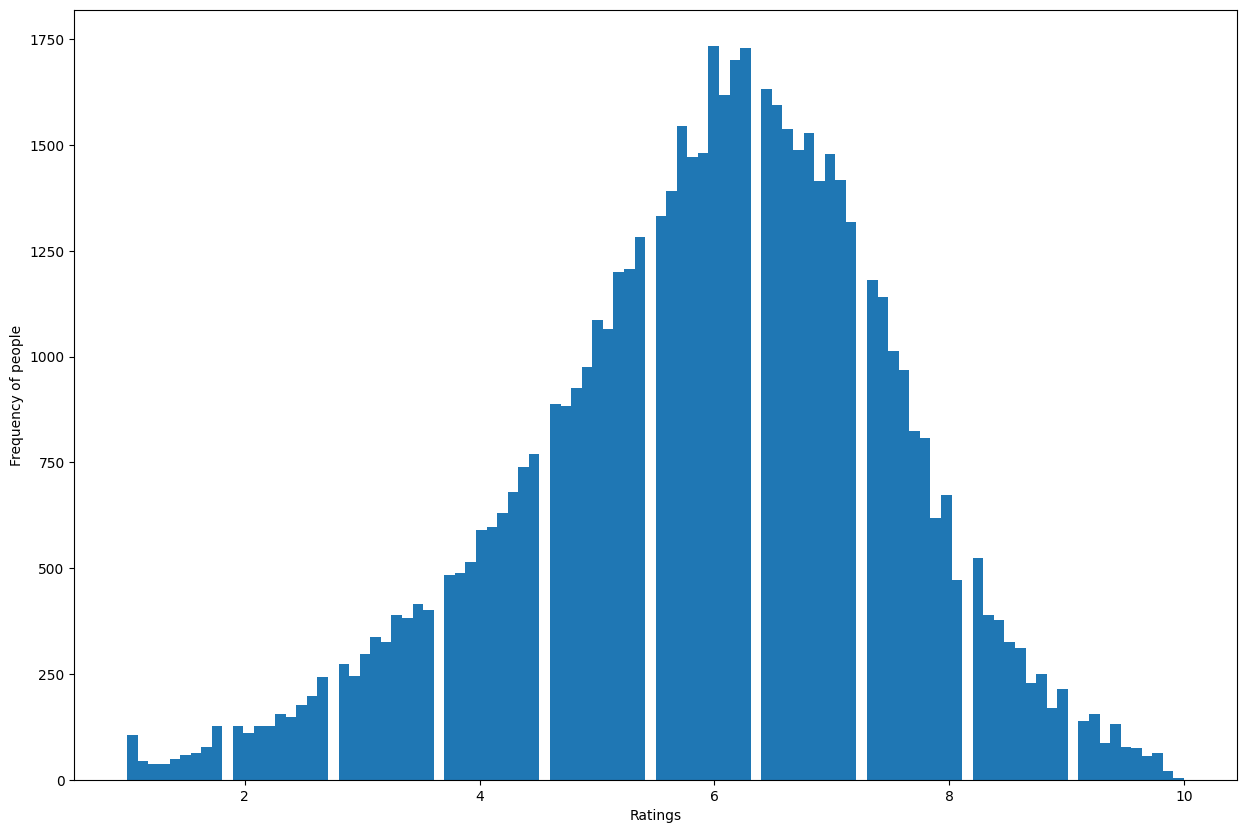

In [22]:
#It is a bell shaped histogram therefore movie ratings is normally distributed.
plt.figure(figsize=(15,10))
plt.hist(data['rating'], bins=100)
plt.xlabel("Ratings")
plt.ylabel("Frequency of people")
plt.show()

#mean, median, and standard deviation of the ratings

In [23]:
#mean of movie rating
data['rating'].mean()

5.932850241545893

In [24]:
#median of movie rating
data['rating'].median()

6.1

In [25]:
#mode of movie rating
data['rating'].mode()

0    6.0
Name: rating, dtype: float64

In [26]:
#standard deviation of movie rating
data['rating'].std()

1.553030800154227

In [27]:
df=pd.DataFrame(data)

In [28]:
df

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,Other,6.4,348,4.5,4.5,4.5,...,4.5,4.5,Other,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,Other,6.0,20,0.0,14.5,4.5,...,4.5,14.5,Other,0,0,1,0,0,0,0
2,3,$21 a Day Once a Month,1941,7,Other,8.2,5,0.0,0.0,0.0,...,24.5,24.5,Other,0,1,0,0,0,0,1
3,4,"$40,000",1996,70,Other,8.2,6,14.5,0.0,0.0,...,34.5,45.5,Other,0,0,1,0,0,0,0
4,5,"$50,000 Climax Show, The",1975,71,Other,3.4,17,24.5,4.5,0.0,...,0.0,24.5,Other,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58783,58784,tom thumb,1958,98,Other,6.5,274,4.5,4.5,4.5,...,4.5,4.5,Other,0,1,0,0,0,0,0
58784,58785,www.XXX.com,2003,105,Other,1.1,12,45.5,0.0,0.0,...,0.0,24.5,Other,0,0,0,1,0,1,0
58785,58786,www.hellssoapopera.com,1999,100,Other,6.6,5,24.5,0.0,24.5,...,24.5,44.5,Other,0,0,0,0,0,0,0
58786,58787,xXx,2002,132,85000000.0,5.5,18514,4.5,4.5,4.5,...,4.5,4.5,PG-13,1,0,0,0,0,0,0


#Finding correlations b/w rating and Animation, Comedy, Drama, Documentary, Romance


In [29]:
corr = df['rating'].corr(df['Action'])

In [30]:
corr

-0.12146756121881915

In [31]:
rating = data['rating']
action = data['Action']
animation = data['Animation']
comedy = data['Comedy']
drama = data['Drama']
documentary = data['Documentary']
romance = data['Romance']


In [32]:
correlations = {}
columns = ['Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance']

for column in columns:
    correlation = np.corrcoef(rating, data[column])[0, 1]
    correlations[column] = correlation


In [33]:
correlations

{'Action': -0.12146756121881915,
 'Animation': 0.10845262155375447,
 'Comedy': 0.009403227597929978,
 'Drama': 0.10920961740119065,
 'Documentary': 0.11578349486542917,
 'Romance': 0.04409702893377532}

#Comparing the average ratings for different genres using a bar plot

In [34]:
mask1 = data['Action'] == 1
mask1

0        False
1        False
2        False
3        False
4        False
         ...  
58783    False
58784    False
58785    False
58786     True
58787     True
Name: Action, Length: 58788, dtype: bool

In [35]:
Action_movie=data[mask1]

In [36]:
Action_movie

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
6,7,$windle,2002,93,Other,5.3,200,4.5,0.0,4.5,...,4.5,14.5,R,1,0,0,1,0,0,0
14,15,'A' gai waak,1983,106,Other,7.1,1259,4.5,4.5,4.5,...,14.5,24.5,PG-13,1,0,1,0,0,0,0
15,16,'A' gai waak juk jaap,1987,101,Other,7.2,614,4.5,4.5,4.5,...,14.5,14.5,PG-13,1,0,1,0,0,0,0
18,19,'Crocodile' Dundee II,1988,110,Other,5.0,7252,4.5,4.5,4.5,...,4.5,4.5,Other,1,0,1,0,0,0,0
22,23,'Gator Bait,1974,88,Other,3.5,100,14.5,14.5,24.5,...,4.5,4.5,Other,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58725,58726,Zulu,1964,138,Other,7.7,5049,4.5,4.5,4.5,...,14.5,24.5,Other,1,0,0,1,0,0,0
58737,58738,Zvezda,2002,97,1300000.0,7.5,168,4.5,4.5,4.5,...,14.5,24.5,Other,1,0,0,1,0,0,0
58782,58783,sIDney,2002,15,Other,7.0,8,14.5,0.0,0.0,...,14.5,24.5,Other,1,0,0,0,0,0,1
58786,58787,xXx,2002,132,85000000.0,5.5,18514,4.5,4.5,4.5,...,4.5,4.5,PG-13,1,0,0,0,0,0,0


In [37]:
#Avg rating of an action movie
Action_avg=Action_movie['rating'].mean()
Action_avg

5.292022184300341

In [38]:
mask2 = data['Animation'] == 1
Animation_movie=data[mask2]
Animation_movie

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
2,3,$21 a Day Once a Month,1941,7,Other,8.2,5,0.0,0.0,0.0,...,24.5,24.5,Other,0,1,0,0,0,0,1
19,20,'E',1981,7,Other,8.6,15,0.0,0.0,0.0,...,24.5,45.5,Other,0,1,1,0,0,0,1
26,27,"'Hyp-Nut-Tist', The",1935,6,Other,6.2,18,4.5,0.0,0.0,...,14.5,0.0,Other,0,1,1,0,0,0,1
46,47,"'Teddy' Bears, The",1907,15,Other,5.8,23,4.5,4.5,4.5,...,4.5,4.5,Other,0,1,0,0,0,0,1
58,59,+1 -1,1987,7,Other,9.4,6,0.0,0.0,0.0,...,45.5,45.5,Other,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58692,58693,Zoom at the Top,1962,6,Other,6.3,29,4.5,0.0,0.0,...,0.0,14.5,Other,0,1,1,0,0,0,1
58693,58694,"Zoot Cat, The",1944,7,Other,6.6,47,4.5,0.0,4.5,...,4.5,14.5,Other,0,1,1,0,0,0,1
58772,58773,barefootin',1987,3,Other,5.7,6,0.0,0.0,0.0,...,0.0,0.0,Other,0,1,0,0,0,0,1
58780,58781,f8,2001,13,Other,7.6,7,0.0,0.0,0.0,...,24.5,0.0,Other,0,1,0,0,0,0,1


In [39]:
#Avg rating of an action movie
Animation_avg=Animation_movie['rating'].mean()
Animation_avg

6.5836856368563685

In [40]:
mask3 = data['Comedy'] == 1
Comedy_movie=data[mask3]
Comedy_movie

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,Other,6.4,348,4.5,4.5,4.5,...,4.5,4.5,Other,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,Other,6.0,20,0.0,14.5,4.5,...,4.5,14.5,Other,0,0,1,0,0,0,0
3,4,"$40,000",1996,70,Other,8.2,6,14.5,0.0,0.0,...,34.5,45.5,Other,0,0,1,0,0,0,0
12,13,"'?' Motorist, The",1906,10,Other,7.0,44,4.5,0.0,0.0,...,4.5,14.5,Other,0,0,1,0,0,0,1
14,15,'A' gai waak,1983,106,Other,7.1,1259,4.5,4.5,4.5,...,14.5,24.5,PG-13,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58746,58747,Zwei Nasen tanken Super,1984,95,Other,3.1,164,24.5,14.5,14.5,...,4.5,14.5,Other,0,0,1,0,0,0,0
58751,58752,"Zwillinge vom Zillertal, Die",1957,94,Other,3.7,7,0.0,14.5,14.5,...,0.0,0.0,Other,0,0,1,0,0,0,0
58757,58758,Zwischensaison,1992,95,Other,6.5,27,0.0,4.5,0.0,...,24.5,14.5,Other,0,0,1,0,0,0,0
58775,58776,eMale,2001,17,Other,7.3,15,0.0,0.0,0.0,...,24.5,24.5,Other,0,0,1,0,0,0,1


In [41]:
#Avg rating of an comedy movie
Comedy_avg=Comedy_movie['rating'].mean()
Comedy_avg

5.955491864975971

In [42]:
mask4 = data['Drama'] == 1
Drama_movie=data[mask4]
Drama_movie

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,Other,6.4,348,4.5,4.5,4.5,...,4.5,4.5,Other,0,0,1,1,0,0,0
5,6,$pent,2000,91,Other,4.3,45,4.5,4.5,4.5,...,14.5,14.5,Other,0,0,0,1,0,0,0
6,7,$windle,2002,93,Other,5.3,200,4.5,0.0,4.5,...,4.5,14.5,R,1,0,0,1,0,0,0
8,9,'38,1987,97,Other,6.6,18,4.5,4.5,4.5,...,4.5,24.5,Other,0,0,0,1,0,0,0
10,11,'68,1988,99,Other,5.4,23,4.5,0.0,4.5,...,14.5,4.5,Other,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58771,58772,alaska.de,2000,89,Other,6.2,186,4.5,4.5,4.5,...,14.5,4.5,Other,0,0,0,1,0,0,0
58773,58774,deadend.com,2002,120,Other,6.9,53,64.5,4.5,0.0,...,4.5,4.5,Other,0,0,0,1,0,0,0
58777,58778,eXXXorcismos,2002,78,Other,4.2,11,34.5,0.0,0.0,...,4.5,24.5,Other,0,0,0,1,0,0,0
58778,58779,eXistenZ,1999,97,Other,6.7,14742,4.5,4.5,4.5,...,14.5,4.5,R,0,0,0,1,0,0,0


In [43]:
#Avg rating of a Drama movie
Drama_avg=Drama_movie['rating'].mean()
Drama_avg

6.153683920957315

In [44]:
mask5 = data['Documentary'] == 1
Documentary_movie=data[mask5]
Documentary_movie

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
7,8,'15',2002,25,Other,6.7,24,4.5,4.5,4.5,...,4.5,14.5,Other,0,0,0,0,1,0,1
17,18,'Bullitt': Steve McQueen's Commitment to Reality,1968,10,Other,6.6,37,0.0,0.0,4.5,...,4.5,4.5,Other,0,0,0,0,1,0,1
49,50,'What's Your 'I.Q.'?' Number Two,1940,9,Other,5.9,9,0.0,0.0,14.5,...,14.5,14.5,Other,0,0,0,0,1,0,1
100,101,1 Giant Leap,2002,155,Other,6.6,75,4.5,4.5,0.0,...,14.5,34.5,Other,0,0,0,0,1,0,0
103,104,"1,99 - Um Supermercado Que Vende Palavras",2003,72,Other,4.9,28,4.5,4.5,4.5,...,4.5,14.5,Other,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58576,58577,Zico,2002,86,Other,6.7,7,0.0,14.5,0.0,...,24.5,24.5,Other,0,0,0,0,1,0,0
58586,58587,Ziggy Stardust and the Spiders from Mars,1973,90,Other,6.4,360,4.5,4.5,4.5,...,4.5,34.5,Other,0,0,0,0,1,0,0
58610,58611,Zion Canyon: Treasure of the Gods,1996,40,Other,7.1,17,0.0,4.5,4.5,...,14.5,14.5,Other,0,0,0,0,1,0,1
58682,58683,Zoo,1993,130,Other,7.8,15,4.5,4.5,0.0,...,4.5,24.5,Other,0,0,0,0,1,0,0


In [45]:
#Avg rating of a Documentary movie
Documentary_avg=Documentary_movie['rating'].mean()
Documentary_avg

6.650576036866359

In [46]:
mask6 = data['Romance'] == 1
Romance_movie=data[mask6]
Romance_movie

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
28,29,'I Know Where I'm Going!',1945,92,Other,7.7,825,4.5,4.5,4.5,...,14.5,34.5,Other,0,0,0,1,0,1,0
32,33,'M' Word,1996,99,Other,4.6,6,14.5,0.0,14.5,...,0.0,14.5,Other,0,0,1,0,0,1,0
47,48,'Til There Was You,1997,113,23000000.0,4.8,799,4.5,4.5,4.5,...,4.5,14.5,PG-13,0,0,1,0,0,1,0
48,49,'Til We Meet Again,1940,99,Other,6.3,83,4.5,4.5,0.0,...,4.5,24.5,Other,0,0,0,1,0,1,0
53,54,(Haru),1996,118,Other,6.6,19,4.5,0.0,14.5,...,14.5,14.5,Other,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58709,58710,Zouzou,1934,92,Other,6.5,64,4.5,4.5,4.5,...,4.5,4.5,Other,0,0,0,0,0,1,0
58714,58715,Zubeidaa,2001,153,Other,6.6,89,0.0,0.0,4.5,...,14.5,24.5,Other,0,0,0,1,0,1,0
58732,58733,Zus & zo,2001,100,Other,6.7,502,4.5,4.5,4.5,...,4.5,4.5,Other,0,0,1,1,0,1,0
58739,58740,Zvezda plenitelnogo schastya,1975,167,Other,6.5,54,0.0,0.0,0.0,...,14.5,34.5,Other,0,0,0,1,0,1,0


In [47]:
#Avg rating of a Romance movie
Romance_avg=Romance_movie['rating'].mean()
Romance_avg

6.163996627318719

In [48]:
parameters = ['Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance']
values = [Action_avg, Animation_avg, Comedy_avg, Drama_avg, Documentary_avg, Romance_avg]

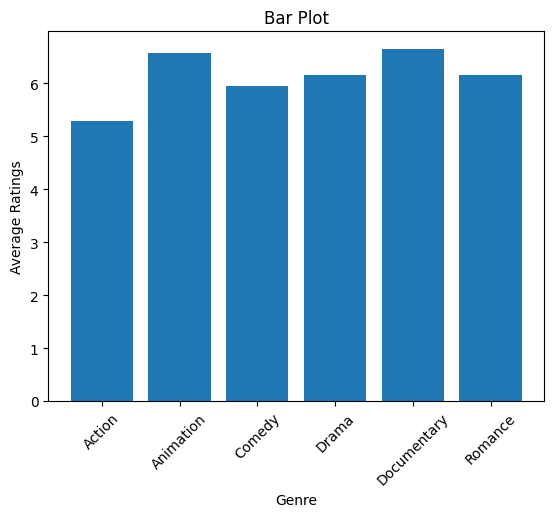

In [49]:
#Bar plot
plt.bar(parameters, values)
plt.xlabel('Genre')
plt.ylabel('Average Ratings')
plt.title('Bar Plot')
plt.xticks(rotation=45)
plt.show()


#relationship between the movie duration and its rating

In [50]:
corr = df['rating'].corr(df['length'])

In [51]:
corr

-0.030734414103833138

#differences in the average ratings between old and new movie

In [55]:
mask7 = data['year'] >= 2000
New_movie=data[mask7]
New_movie

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
5,6,$pent,2000,91,Other,4.3,45,4.5,4.5,4.5,...,14.5,14.5,Other,0,0,0,1,0,0,0
6,7,$windle,2002,93,Other,5.3,200,4.5,0.0,4.5,...,4.5,14.5,R,1,0,0,1,0,0,0
7,8,'15',2002,25,Other,6.7,24,4.5,4.5,4.5,...,4.5,14.5,Other,0,0,0,0,1,0,1
42,43,'R Xmas,2001,83,Other,4.9,288,14.5,4.5,4.5,...,4.5,4.5,R,0,0,0,1,0,0,0
51,52,(A)Torzija,2002,13,Other,7.2,71,4.5,0.0,4.5,...,14.5,24.5,Other,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58780,58781,f8,2001,13,Other,7.6,7,0.0,0.0,0.0,...,24.5,0.0,Other,0,1,0,0,0,0,1
58782,58783,sIDney,2002,15,Other,7.0,8,14.5,0.0,0.0,...,14.5,24.5,Other,1,0,0,0,0,0,1
58784,58785,www.XXX.com,2003,105,Other,1.1,12,45.5,0.0,0.0,...,0.0,24.5,Other,0,0,0,1,0,1,0
58786,58787,xXx,2002,132,85000000.0,5.5,18514,4.5,4.5,4.5,...,4.5,4.5,PG-13,1,0,0,0,0,0,0


In [54]:
#avg rating of new movie
New_avg=New_movie['rating'].mean()
New_avg

6.270071368986931

In [56]:
mask8 = data['year'] < 2000
Old_movie=data[mask8]
Old_movie

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,Other,6.4,348,4.5,4.5,4.5,...,4.5,4.5,Other,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,Other,6.0,20,0.0,14.5,4.5,...,4.5,14.5,Other,0,0,1,0,0,0,0
2,3,$21 a Day Once a Month,1941,7,Other,8.2,5,0.0,0.0,0.0,...,24.5,24.5,Other,0,1,0,0,0,0,1
3,4,"$40,000",1996,70,Other,8.2,6,14.5,0.0,0.0,...,34.5,45.5,Other,0,0,1,0,0,0,0
4,5,"$50,000 Climax Show, The",1975,71,Other,3.4,17,24.5,4.5,0.0,...,0.0,24.5,Other,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58772,58773,barefootin',1987,3,Other,5.7,6,0.0,0.0,0.0,...,0.0,0.0,Other,0,1,0,0,0,0,1
58778,58779,eXistenZ,1999,97,Other,6.7,14742,4.5,4.5,4.5,...,14.5,4.5,R,0,0,0,1,0,0,0
58781,58782,pURe kILLjoy,1998,87,Other,5.2,6,0.0,14.5,14.5,...,0.0,14.5,Other,0,0,0,0,0,0,0
58783,58784,tom thumb,1958,98,Other,6.5,274,4.5,4.5,4.5,...,4.5,4.5,Other,0,1,0,0,0,0,0


In [57]:
#avg rating of new movie
Old_avg=Old_movie['rating'].mean()
Old_avg

5.857051188566429

In [59]:
#difference in average ratings
Diff_rating=New_avg-Old_avg
Diff_rating

0.41302018042050204

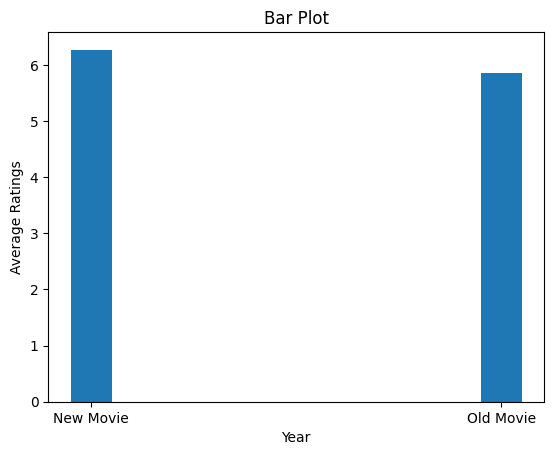

In [62]:
parameters = ['New Movie', 'Old Movie']
values = [New_avg, Old_avg]
#Bar plot
plt.bar(parameters, values,width=0.1)
plt.xlabel('Year')
plt.ylabel('Average Ratings')
plt.title('Bar Plot')
plt.show()


#top-rated movies based on the average ratings across all genres

In [79]:
#Top Action movie
sorted_data = Action_movie.sort_values(by='rating', ascending=False)
top_action=sorted_data[['title', 'rating']].head(1)
top_action

29496    9.8
Name: rating, dtype: float64

In [78]:
#Top Animation movie
sorted_data = Animation_movie.sort_values(by='rating', ascending=False)
top_animation=sorted_data[['title', 'rating']].head(1)
top_animation

45657    9.8
Name: rating, dtype: float64

In [77]:
#Top Comedy movie
sorted_data = Comedy_movie.sort_values(by='rating', ascending=False)
top_comedy=sorted_data[['title', 'rating']].head(1)
top_comedy

18015    10.0
Name: rating, dtype: float64

In [76]:
#Top Drama movie
sorted_data = Drama_movie.sort_values(by='rating', ascending=False)
top_drama=sorted_data[['title', 'rating']].head(1)
top_drama

49845    10.0
Name: rating, dtype: float64

In [74]:
#Top Documentary movie
sorted_data = Documentary_movie.sort_values(by='rating', ascending=False)
top_documentary=sorted_data[['title', 'rating']].head(1)
top_documentary

13170    9.9
Name: rating, dtype: float64

In [75]:
#Top Romance movie
sorted_data = Romance_movie.sort_values(by='rating', ascending=False)
top_romance=sorted_data[['title', 'rating']].head(1)
top_romance

15658    9.9
Name: rating, dtype: float64

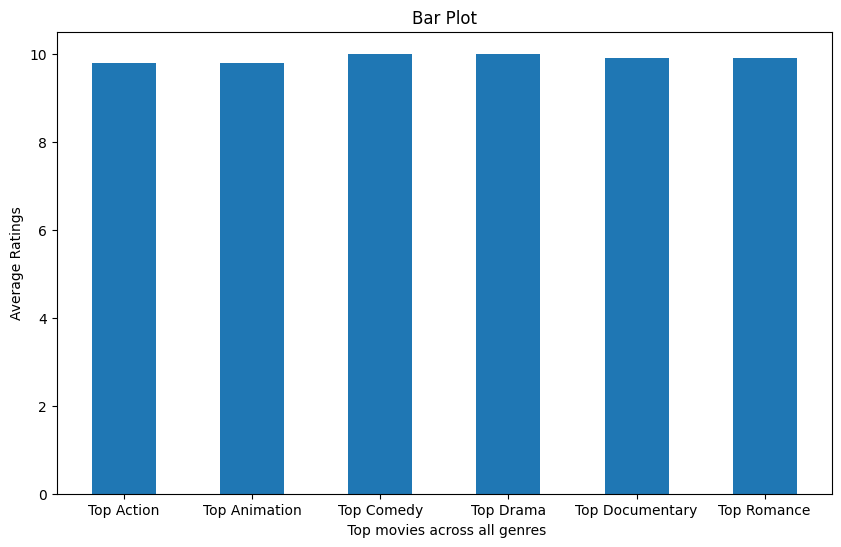

In [87]:
parameters = ['Top Action', 'Top Animation', 'Top Comedy', 'Top Drama', 'Top Documentary', 'Top Romance']
values = [9.8, 9.8, 10.0, 10.0, 9.9, 9.9]
#Bar plot
plt.figure(figsize=(10, 6))
plt.bar(parameters, values, width=0.5)
plt.xlabel(' Top movies across all genres')
plt.ylabel('Average Ratings')
plt.title('Bar Plot')
plt.show()